# SVM LAB

The Support Vector Classifier lab discussed how support vector machines are used to classify data using linear boundaries.  
The dependent variable in IRIS data is scattered every where, 
making it hard to create a linear boundary for classifying the observations. 
Below we will fit a SVM model with a polynomial kernal to classify the observations into classes 
 * Setosa, 
 * Virginica and 
 * Versicolor.

### Load R Library with Iris Data

In [1]:
library("e1071")

Look at the data a little

In [2]:
head(iris,5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


Attach the iris data in memory so you can reference it directly.

In [3]:
attach(iris)

Now create a model using the "svm" function using a linear kernal first and evaluate its performance.

For now we will limit ourself to the using just two features:
 * Sepal.Length
 * Sepal.Width

In [5]:
library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.16.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library(caTools)

In [6]:
library(caTools)
set.seed(1000) # set.seed() will help us to reproduce the results.
split = sample.split(iris$Species, SplitRatio=0.66)

train_data  = subset(iris, split==TRUE)

# Test data will have the rest 30% of data
test_data  = subset(iris, split==FALSE)

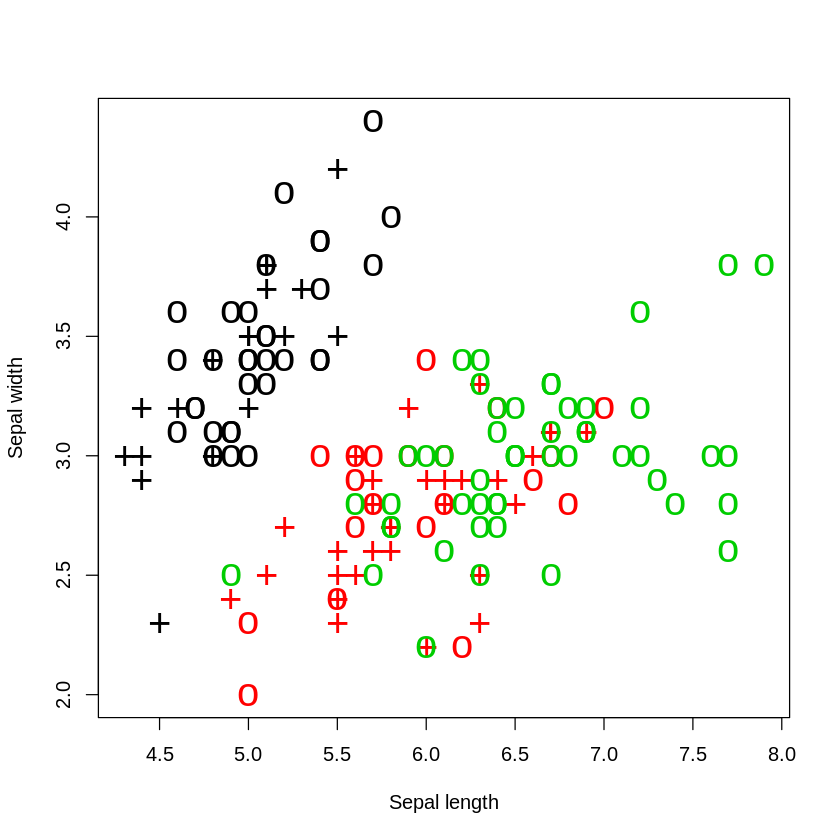

In [7]:
# Fit the model using Sepal.Length and Sepal.Width as the predictors. Use a linear kernal to fit the model.
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = train_data, kernel = "linear")

# Plot the Species and show the support vectors on graph. 
# the + signs are support vectors
plot(iris$Sepal.Length, iris$Sepal.Width, col = as.integer(iris[, 5]), # color the points based on species 
     pch = c("o","+")[1:150 %in% svm.model$index + 1], 
       # Mark the support vectors with a `+` sign and test with a `o` sign
       # "1:150 %in% svm.model$index" will generate a vector of size 150
       # with TRUE and FALSE values. A TRUE is assigned if the value is a 
       # support vector. Addimg one to the vector will give values 1 and 2 
       # instead of TRUE(1) and FALSE(0). Every 1 in the vector is displayed
       # as o and 2 is displayed as +. 
     cex = 2, 
     xlab = "Sepal length", ylab = "Sepal width")

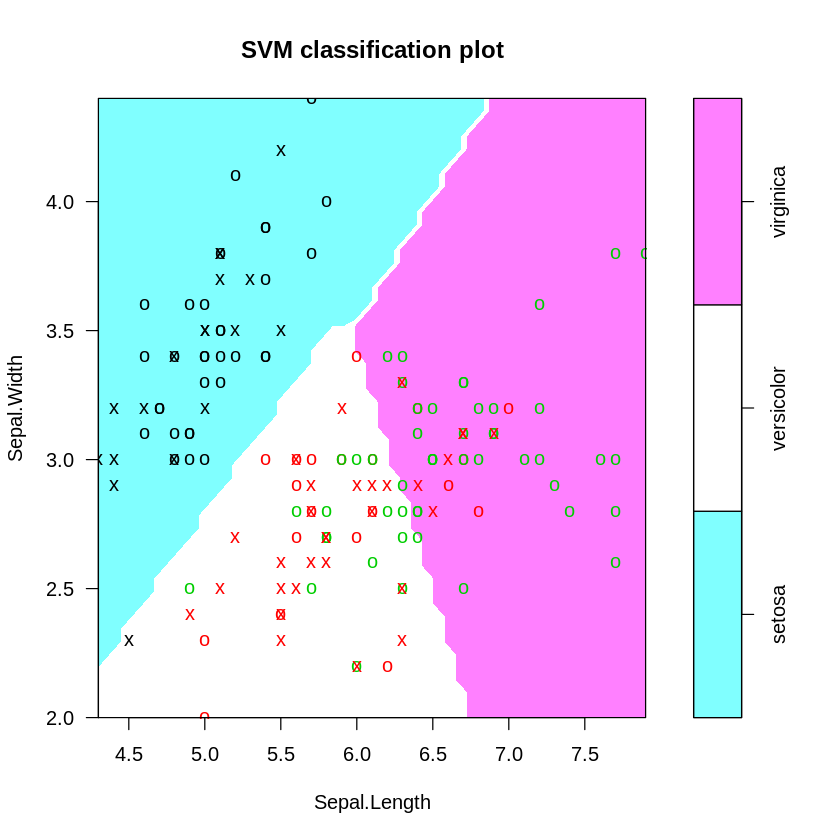

In [8]:
# Plot the Species by splitting the feature space into three different regions according to species class
plot(svm.model, iris, Sepal.Width ~ Sepal.Length, # Plot the model predictions with sepal.width on y-axis and sepal.length
                                                  # on x-axis
     slice = list(sepal.width = 1, sepal.length = 2)) # a list of named numeric values for the dimensions held constant 
                                                      # slice is needed if more than two variables are used.

In [9]:
# Make predictions of species using the svm model built
svm.pred  <- predict(svm.model, test_data[,-5]) 

# Build a confusion matrix for the predictions made against the original classes of flowers
library(caret)
confusionMatrix(svm.pred, test_data[,5])

Loading required package: lattice
Loading required package: ggplot2


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         10         6
  virginica       0          7        11

Overall Statistics
                                          
               Accuracy : 0.7451          
                 95% CI : (0.6037, 0.8567)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.166e-09       
                                          
                  Kappa : 0.6176          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.5882           0.6471
Specificity                 1.0000            0.8235           0.7941
Pos Pred Value              1.0000            0.6250           0.6111
Neg Pred Value              1.0000            0.8000           0.8182
P

The svm model did not do a great job with a linear kernal. The accuracy of the model is 74.5
         
         (17+10+11)/51  --- number of TRUE predictions/total observations 
         
**Reference: ** [Confusion matrix function and its results](http://rpubs.com/prcuny/161764)

#### Fit the model using a Non-Linear Kernal. 

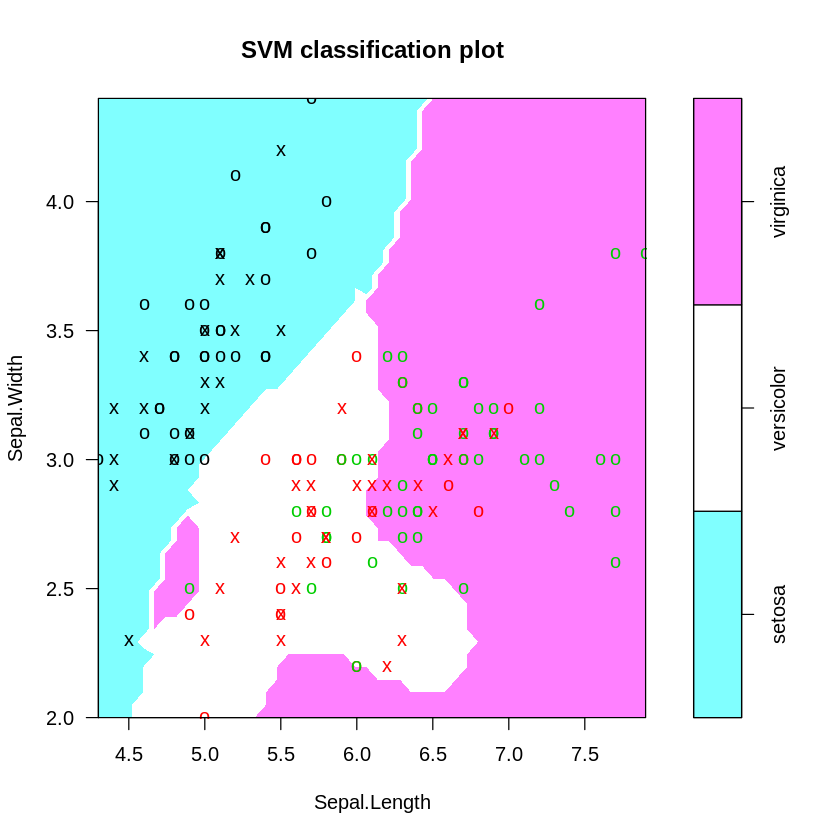

In [10]:
# Fit the model using a polynomial kernal and Sepal.Length, Sepal.Width as predictor variables.
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = train_data, kernel = 'polynomial', degree=8, coef0=1)
                      # For polynomial kernels we use the parameter degree to adjust the polynomial order. 
                      # For radial kernels we use the gamma parameter to adjust the y value.
                      # Independent term in kernel function. It is only significant in ‘polynomial’ 
                      # and ‘sigmoid’ kernals
                  
plot(svm.model, iris, Sepal.Width ~ Sepal.Length,      # Plot the predictions
     slice = list(Sepal.Width = 1, Sepal.Length = 2)) 

In [11]:
svm.pred  <- predict(svm.model, test_data[,-5]) 
confusionMatrix(svm.pred, test_data[,5]) # show the confusion matrix

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         16          0         0
  versicolor      1          6         5
  virginica       0         11        12

Overall Statistics
                                          
               Accuracy : 0.6667          
                 95% CI : (0.5208, 0.7924)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.178e-06       
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 0.9412            0.3529           0.7059
Specificity                 1.0000            0.8235           0.6765
Pos Pred Value              1.0000            0.5000           0.5217
Neg Pred Value              0.9714            0.7179           0.8214
P

There is no improvement in the accuracy of the model even after using a polynomial of degree 8.  
We previously only used just two attributes for making predictions. 
We will now use all independent variables for building the model.

In [12]:
svm.model <- svm(Species ~ ., data = train_data, kernel = 'polynomial', degree=8, coef0=1)

In [13]:
svm.pred  <- predict(svm.model, test_data[,-5]) 
confusionMatrix(svm.pred, test_data[,5]) # show the confusion matrix

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         17         3
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9412          
                 95% CI : (0.8376, 0.9877)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9118          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8235
Specificity                 1.0000            0.9118           1.0000
Pos Pred Value              1.0000            0.8500           1.0000
Neg Pred Value              1.0000            1.0000           0.9189
P

Using all variables as predictors we got over 90% accuracy in our model. 

#### Radial Kernal

Now we will investigate using a radial kernel!

In [14]:
svm.model <- svm(Species ~., data=train_data, kernel='radial', gamma=1, cost=1)

In [15]:
yhat <- predict(svm.model, test_data)
confusionMatrix(yhat, test_data[,'Species'])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         17         1
  virginica       0          0        16

Overall Statistics
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9706          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9412
Specificity                 1.0000            0.9706           1.0000
Pos Pred Value              1.0000            0.9444           1.0000
Neg Pred Value              1.0000            1.0000           0.9714
P

#### Tune the model

Tuning SVM to find the best cost and gamma..

In [16]:
svm_tune <- tune(svm, train.x=train_data[,-5], train.y=train_data[,5], 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

print(svm_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.05111111 



After you find the best cost and gamma, you can create AVM model again and run the model

In [17]:
svm_model_after_tune <- svm(Species ~ ., data=train_data, kernel="radial", cost=1, gamma=0.5)
summary(svm_model_after_tune)


Call:
svm(formula = Species ~ ., data = train_data, kernel = "radial", 
    cost = 1, gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  46

 ( 11 17 18 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [18]:
yhat <- predict(svm_model_after_tune, test_data)
confusionMatrix(yhat, test_data[,'Species'])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         17         0
  virginica       0          0        17

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9302, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

We have now gotten 100% accurate results after tuning the model. 

**Additional Reference:** 
  * [SVM tutorial 1](http://www.di.fc.ul.pt/~jpn/r/svm/svm.html#non-linearly-separable-data) 
  * [SVM tutorial 2](https://rpubs.com/ryankelly/svm)
  
# Save your Notebooks